In [97]:
import os
import sys
import subprocess
from pathlib import Path

repo_root = subprocess.run(
    ["git", "rev-parse", "--show-toplevel"], capture_output=True, text=True
).stdout.strip()

sys.path.append(repo_root)

In [98]:
import numpy as np

from matplotlib import pyplot as plt

import warnings
warnings.filterwarnings("ignore", category=RuntimeWarning)

import utils, params

from modules import helpers, fitting

import importlib
importlib.reload(utils)
importlib.reload(params)
importlib.reload(helpers)
importlib.reload(fitting)

helpers.set_plot_configs()

In [99]:
MC_dir = '../HiggsTo4L/MC/'
data_dir = '../HiggsTo4L/data/'

In [100]:
print('Higgs:')
mc_higgs = utils.FourLeptonReader([
    MC_dir + 'higgs2011.csv',
    MC_dir + 'higgs2012.csv'
],scalers=params.scales_higgs)

print('ZZ:')
mc_zz = utils.FourLeptonReader([
    MC_dir + 'zzto4mu2011.csv',
    MC_dir + 'zzto2mu2e2011.csv',
    MC_dir + 'zzto4e2011.csv',

    MC_dir + 'zzto4mu2012.csv',
    MC_dir + 'zzto2mu2e2012.csv',
    MC_dir + 'zzto4e2012.csv',
],scalers=params.scales_zz)

print('Drell-Yan:')
mc_dy = utils.FourLeptonReader([
    MC_dir + 'dy1050_2011.csv',
    MC_dir + 'dy50_2011.csv',
    MC_dir + 'dy1050_2012.csv',
    MC_dir + 'dy50_2012.csv'
],scalers=params.scales_dy)

print('tt:')
mc_tt = utils.FourLeptonReader([
    MC_dir + 'ttbar2011.csv',
    MC_dir + 'ttbar2012.csv'
],scalers=params.scales_tt)

Higgs:
 Conservation cut: 50542 events passed out of 52248 (97%)
 Leptons cut: 44320 events passed out of 50542 (88%)
 Z cut: 41818 events passed out of 44320 (94%)
 Conservation cut: 39353 events passed out of 40530 (97%)
 Leptons cut: 35855 events passed out of 39353 (91%)
 Z cut: 33996 events passed out of 35855 (95%)
ZZ:
 Conservation cut: 207439 events passed out of 209504 (99%)
 Leptons cut: 162016 events passed out of 207439 (78%)
 Z cut: 123286 events passed out of 162016 (76%)
 Conservation cut: 152367 events passed out of 155454 (98%)
 Leptons cut: 110224 events passed out of 152367 (72%)
 Z cut: 68099 events passed out of 110224 (62%)
 Conservation cut: 140811 events passed out of 144999 (97%)
 Leptons cut: 93161 events passed out of 140811 (66%)
 Z cut: 78064 events passed out of 93161 (84%)
 Conservation cut: 182153 events passed out of 183843 (99%)
 Leptons cut: 148678 events passed out of 182153 (82%)
 Z cut: 116017 events passed out of 148678 (78%)
 Conservation cut: 12

In [101]:
bins = np.linspace(50,200,101)
bin_centers = (bins[1:] + bins[:-1]) / 2
bin_width = bins[1] - bins[0]

higgs_hist = mc_higgs.get_m4l_histogram(bins)
zz_hist = mc_zz.get_m4l_histogram(bins)
dy_hist = mc_dy.get_m4l_histogram(bins)
tt_hist = mc_tt.get_m4l_histogram(bins)

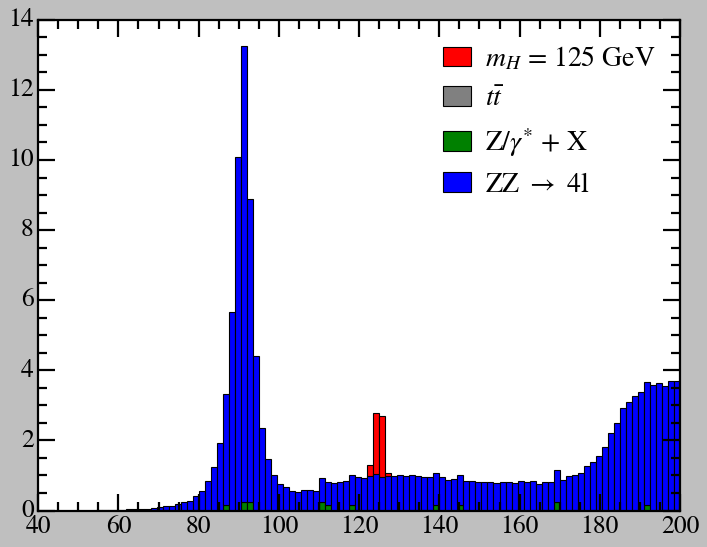

In [102]:
fig, ax = plt.subplots(figsize=(9,7))

stack = ax.bar(bin_centers, higgs_hist, align='center', width=bin_width, label=r'$m_{H}$ = 125 GeV', color='red')
stack = ax.bar(bin_centers, tt_hist, align='center', width=bin_width, label=r'$t\bar{t}$', color='grey')
stack = ax.bar(bin_centers, dy_hist, align='center', width=bin_width, label=r'Z/$\gamma^{*}$ + X', color='green', bottom=tt_hist)
stack = ax.bar(bin_centers, zz_hist, align='center', width=bin_width, label=r'ZZ $\rightarrow$ 4l', color='blue', bottom=tt_hist+dy_hist)

ax.legend(loc='upper right', frameon=False, ncol=1, handletextpad=0.5, handlelength=1.0, columnspacing=0.5)

plt.tight_layout()
plt.show()